4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [1]:
# Import utilities
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()  

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Check shapes of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels[0]

9

In [6]:
# Set class names
class_names = [
    "T-shirt/Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

len(class_names)

10

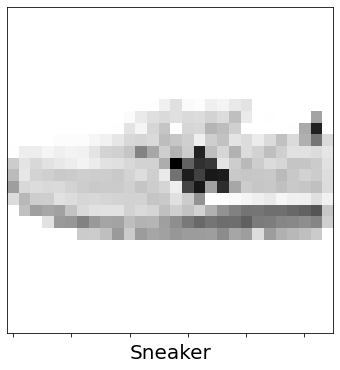

In [41]:
# Visualize random image and its class
import random

random_index = random.randint(0, len(train_data))

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(train_data[random_index], cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_visible(False)
ax.set_xlabel(f"{class_names[train_labels[random_index]]}", 
                fontsize=12)
ax.xaxis.label.set_size(20);

Since we know that neural networks tend to prefer normalized data, we will normalize our training and test data straight away

In [38]:
np.max(train_data), np.min(train_data), np.max(test_data), np.min(test_data)

(255, 0, 255, 0)

Our image pixels are encoded with values varying from 0-255.

Lets divide all vectors by the maximum value so we can obtain normalized data.

In [119]:
# Normlize our data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

np.min(train_data_norm), np.max(train_data_norm), np.min(test_data_norm), np.max(test_data_norm)

(0.0, 1.0, 0.0, 1.0)

17767


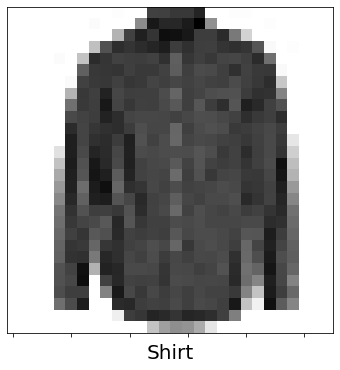

In [120]:
# Plot random normalized image
random_index = random.randint(0, len(train_data_norm))
print(random_index)

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(train_data_norm[random_index], cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_visible(False)
ax.set_xlabel(f"{class_names[train_labels[random_index]]}", 
                fontsize=12)
ax.xaxis.label.set_size(20);

Since we have already normalized out data, we can proceed to creating first model

Let's first try creating a model with one hidden layer with 18 neurons.

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5997 - accuracy: 0.7915 - val_loss: 0.4814 - val_accuracy: 0.8270
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4337 - accuracy: 0.8483 - val_loss: 0.5136 - val_accuracy: 0.8263
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4057 - accuracy: 0.8575 - val_loss: 0.4402 - val_accuracy: 0.8424
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3888 - accuracy: 0.8634 - val_loss: 0.4257 - val_accuracy: 0.8488
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3778 - accuracy: 0.8666 - val_loss: 0.4407 - val_accuracy: 0.8441
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3682 - accuracy: 0.8695 - val_loss: 0.4376 - val_accuracy: 0.8441
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3612 - accuracy: 0.8724 - val_loss: 0.4230 - val_accuracy:

In [43]:
# Evaluate the model
model_1.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8635


[0.39881229400634766, 0.8634999990463257]

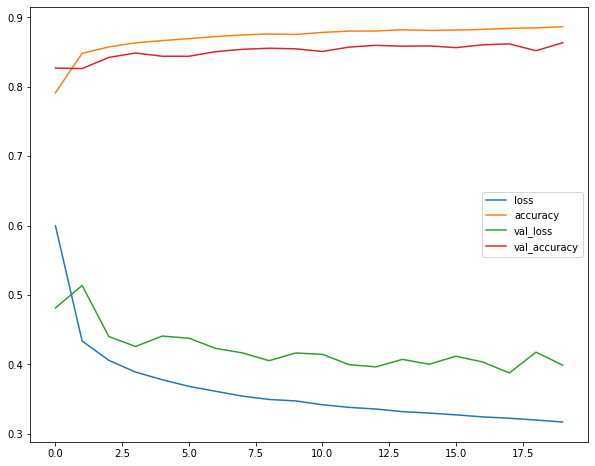

In [45]:
# Plot loss curve
pd.DataFrame(history_1.history).plot(figsize=(10, 8))
plt.legend();

We were able to obtain an accuracy score of ~86% after 20 epochs with only one hidden layer.

Let's improve our layer by adding learning rate scheduler to check for optimal learning rate.

In [47]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Fit the model
history_2 = model_2.fit(train_data_norm,
                        train_labels,
                        epochs=30,
                        validation_data=(test_data_norm, test_labels),
                        callbacks=[lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5918 - accuracy: 0.7968 - val_loss: 0.4676 - val_accuracy: 0.8357 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4316 - accuracy: 0.8480 - val_loss: 0.5218 - val_accuracy: 0.8238 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4055 - accuracy: 0.8559 - val_loss: 0.4445 - val_accuracy: 0.8375 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3885 - accuracy: 0.8613 - val_loss: 0.4427 - val_accuracy: 0.8426 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3802 - accuracy: 0.8630 - val_loss: 0.4331 - val_accuracy: 0.8460 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3700 - accuracy: 0.8674 - val_loss: 0.4396 - val_accuracy: 0.8410 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 4s

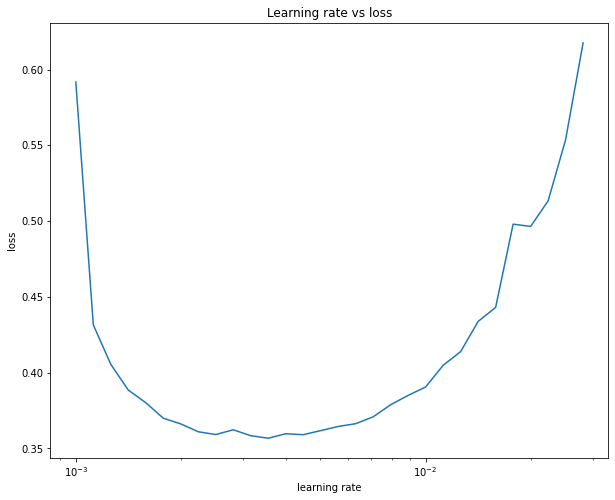

In [48]:
# Plot learning rate vs loss
lrs = 1e-3 * 10 ** (tf.range(30)/20)
plt.figure(figsize=(10, 8))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss");

So the ideal learning rate might be somewhere around 1e-3.

Let's test the learning rate from 1e-4 onwards

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 ** (epoch/10))

# Fit the model
history_3 = model_3.fit(train_data_norm,
                        train_labels,
                        epochs=30,
                        validation_data=(test_data_norm, test_labels),
                        callbacks=[lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0030 - accuracy: 0.6957 - val_loss: 0.7127 - val_accuracy: 0.7678 - lr: 1.0000e-04
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6063 - accuracy: 0.8031 - val_loss: 0.5806 - val_accuracy: 0.8044 - lr: 1.2589e-04
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5167 - accuracy: 0.8262 - val_loss: 0.5249 - val_accuracy: 0.8174 - lr: 1.5849e-04
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4728 - accuracy: 0.8389 - val_loss: 0.4894 - val_accuracy: 0.8290 - lr: 1.9953e-04
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4471 - accuracy: 0.8471 - val_loss: 0.4722 - val_accuracy: 0.8333 - lr: 2.5119e-04
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4284 - accuracy: 0.8524 - val_loss: 0.4657 - val_accuracy: 0.8353 - lr: 3.1623e-04
Epoch 7/30
1875/1875 [============

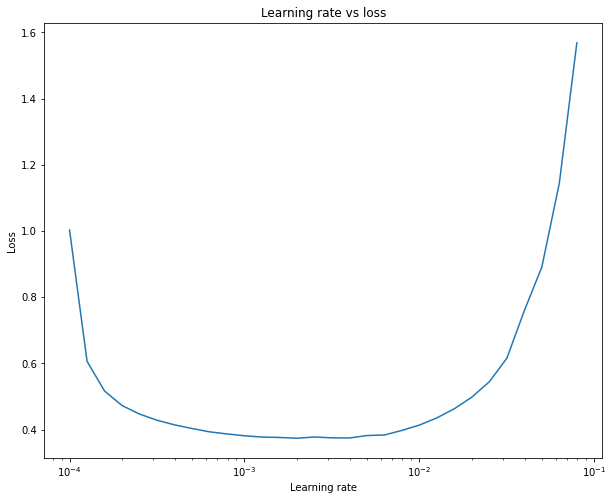

In [53]:
# Let's check the learning rate vs loss curve
lrs = 1e-4 * 10 ** (tf.range(30)/10)

plt.figure(figsize=(10, 8))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss");

Here we can see that the lowest loss is somewhere around 0.003, so lets use 0.0003 as our learning rate and train our model for 40 epochs.

In [55]:
# Set random seed
tf.random.set_seed(42)

# Create the model
ideal_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
ideal_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                    metrics=["accuracy"])

# Fit the model
ideal_model_history = ideal_model.fit(train_data_norm,
                                      train_labels,
                                      epochs=40,
                                      validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7537 - accuracy: 0.7539 - val_loss: 0.5611 - val_accuracy: 0.8121
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5067 - accuracy: 0.8267 - val_loss: 0.5063 - val_accuracy: 0.8245
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4636 - accuracy: 0.8403 - val_loss: 0.4852 - val_accuracy: 0.8279
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4385 - accuracy: 0.8488 - val_loss: 0.4646 - val_accuracy: 0.8364
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4235 - accuracy: 0.8535 - val_loss: 0.4553 - val_accuracy: 0.8391
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4114 - accuracy: 0.8563 - val_loss: 0.4561 - val_accuracy: 0.8404
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4024 - accuracy: 0.8587 - val_loss: 0.4534 - val_accuracy:

The *ideal* learning rate wasn't enough to reach our metrics of 88%+ accuracy, so now we will try adding two more layers to our model and train it for 20 epochs.

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create the model
ideal_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
ideal_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                      metrics=["accuracy"])

# Fit the model
ideal_model_history_2 = ideal_model_2.fit(train_data_norm,
                                          train_labels,
                                          epochs=20,
                                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.8204 - accuracy: 0.7342 - val_loss: 0.5418 - val_accuracy: 0.8149
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4790 - accuracy: 0.8353 - val_loss: 0.4770 - val_accuracy: 0.8341
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4310 - accuracy: 0.8491 - val_loss: 0.4600 - val_accuracy: 0.8353
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4045 - accuracy: 0.8587 - val_loss: 0.4277 - val_accuracy: 0.8519
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3882 - accuracy: 0.8636 - val_loss: 0.4258 - val_accuracy: 0.8493
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3744 - accuracy: 0.8695 - val_loss: 0.4224 - val_accuracy: 0.8498
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3638 - accuracy: 0.8717 - val_loss: 0.4262 - val_accuracy:

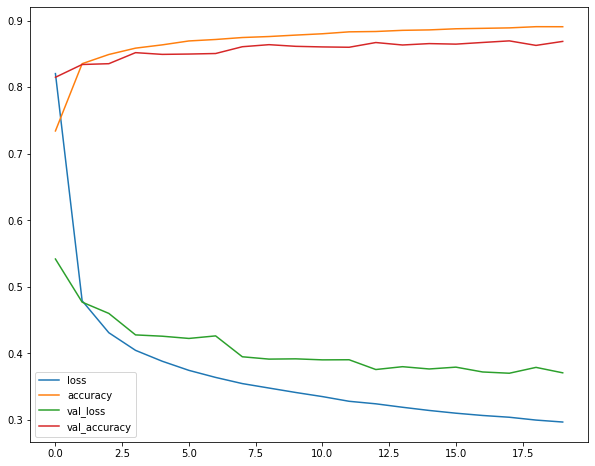

In [57]:
# Plot loss curve
pd.DataFrame(ideal_model_history_2.history).plot(figsize=(10, 8))
plt.legend();

Still not enough.

Let's try lowering the learning rate to 0.0002 and leave it train for 60 epochs.

We will also add weight regulariaztion and reduce layers along with increasing number of hidden units.

In [135]:
# Set random seed
tf.random.set_seed(42)

# Create the model
ideal_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, 
                          activation="relu",
                          kernel_regularizer=tf.keras.regularizers.L2(0.0001)),   
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
ideal_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                      metrics=["accuracy"])

# Fit the model
ideal_model_history_3 = ideal_model_3.fit(train_data_norm,
                                          train_labels,
                                          epochs=60,
                                          validation_data=(test_data_norm, test_labels))

Epoch 1/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8048 - accuracy: 0.7336 - val_loss: 0.5408 - val_accuracy: 0.8244
Epoch 2/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5526 - accuracy: 0.8199 - val_loss: 0.4874 - val_accuracy: 0.8388
Epoch 3/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4951 - accuracy: 0.8352 - val_loss: 0.4495 - val_accuracy: 0.8482
Epoch 4/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4666 - accuracy: 0.8453 - val_loss: 0.4310 - val_accuracy: 0.8547
Epoch 5/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4474 - accuracy: 0.8517 - val_loss: 0.4274 - val_accuracy: 0.8536
Epoch 6/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4328 - accuracy: 0.8554 - val_loss: 0.4172 - val_accuracy: 0.8580
Epoch 7/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4227 - accuracy: 0.8602 - val_loss: 0.4106 - val_accuracy

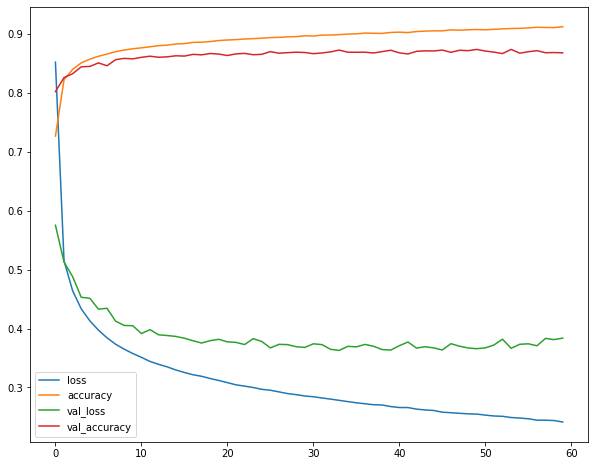

In [136]:
# Plot loss curve
pd.DataFrame(ideal_model_history_2.history).plot(figsize=(10, 8))
plt.legend();

In [137]:
# Evaluate the model on train data
ideal_model_3.evaluate(train_data_norm, train_labels)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9215


[0.2469143122434616, 0.921500027179718]

In [143]:
# Evaluate the model
ideal_model_3.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8843


[0.3538685441017151, 0.8842999935150146]

In [167]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
ideal_model_3.save('saved_models/ideal_model')

Evaluation metric for our model has shown that we are on a level of 88% accuracy on our dataset, so we can proceed with other evaluation metrics.

Thanks to weight regularization and Droput layer we could almost reach an equilibrium between training and test accuracy. 

In [144]:
# Let's plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(y_true, y_preds, classes):
  cm = confusion_matrix(y_true, y_preds, labels=classes)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=class_names)
  
  fig, ax = plt.subplots(figsize=(16,16))
  disp.plot(ax=ax)
  plt.show();

In [145]:
# Let's make predictions
y_probs = ideal_model_3.predict(test_data_norm)
y_preds = tf.argmax(y_probs, axis=1)

y_preds[:5]

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(5,), dtype=int64, numpy=array([9, 2, 1, 1, 6])>

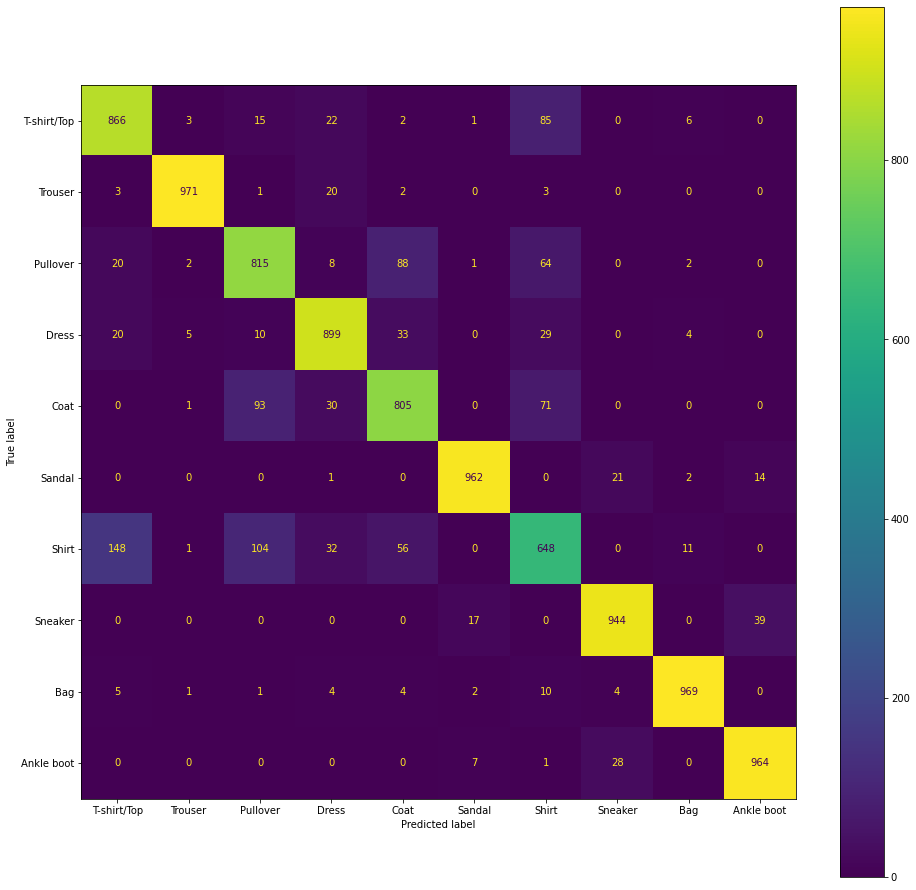

In [146]:
# Plot confusion matrix
show_confusion_matrix(y_true=test_labels, y_preds=y_preds, classes=np.arange(0, 10))

Let's make custom function that show confusion matrix with predictions in percentages

In [147]:
import itertools

def plot_adv_confusion_matrix(y_true, y_pred, classes, figsize=(16, 16), text_size=12):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # plot the figure
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=classes,
         yticklabels=classes)
  
  # Make sure x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colours
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

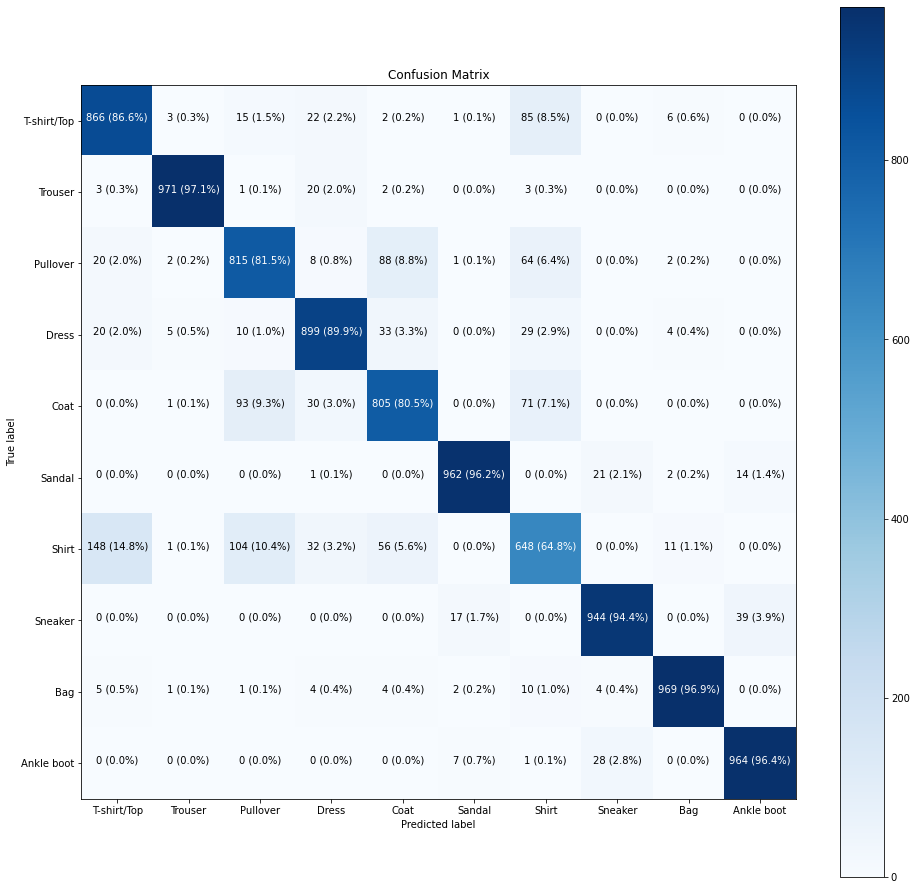

In [148]:
plot_adv_confusion_matrix(y_true=test_labels,
                          y_pred=y_preds,
                          classes=class_names,
                          text_size=10)

In [ ]:
random_index = random.randint(0, len(train_data_norm))
print(random_index)

fig, ax = plt.subplots(figsize=(6, 6))

ax.imshow(train_data_norm[random_index], cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_visible(False)
ax.set_xlabel(f"{class_names[train_labels[random_index]]}", 
                fontsize=12)
ax.xaxis.label.set_size(20);

In [164]:
# Let's make a function to plot images with their predictions
def plot_images(y_true, y_probs, test_data, classes, n_images=3, figsize=(10, 12)):
  fig, axs = plt.subplots(nrows=n_images, 
                          ncols=2, 
                          figsize=(figsize[0], n_images * 4))

  for i in range(n_images):
    random_index = random.randint(0, len(test_data))

    probs = y_probs[random_index]
    predicted_label = tf.argmax(probs).numpy()
    image = test_data[random_index]

    color = ""

    if predicted_label == y_true[random_index]:
      color = "g"
    else:
      color = "r"

    axs[i, 0].imshow(image, cmap=plt.cm.binary)
    axs[i, 0].xaxis.set_ticklabels([])
    axs[i, 0].yaxis.set_visible(False)
    axs[i, 0].set_xlabel(f"{classes[predicted_label]} ({probs[predicted_label] * 100:.2f}%)", c=color)
    axs[i, 0].xaxis.label.set_size(12);

In [150]:
y_probs = ideal_model_3.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.8496580e-08, 1.9084334e-09, 6.6284989e-10, 1.1797074e-09,
        1.8553883e-09, 6.5180133e-03, 1.8440993e-08, 8.4015902e-04,
        3.3228645e-07, 9.9264127e-01],
       [3.3265428e-06, 2.2847108e-13, 9.9972141e-01, 2.9494681e-11,
        1.5169012e-04, 3.1354629e-14, 1.2356100e-04, 6.1580226e-24,
        3.9239931e-10, 3.7172856e-19],
       [2.0494284e-09, 9.9999994e-01, 4.6913536e-11, 1.2639053e-09,
        7.9216367e-10, 3.0989914e-15, 5.4098765e-12, 1.7424194e-23,
        5.8211222e-16, 3.6327767e-22],
       [1.2507442e-09, 9.9999982e-01, 7.9462832e-11, 9.9672476e-08,
        5.1525834e-10, 1.7672766e-13, 1.9374556e-10, 1.1188373e-21,
        4.6335400e-15, 2.6720832e-19],
       [2.3508357e-01, 2.5360041e-06, 1.1602749e-02, 2.9685479e-04,
        5.8725395e-04, 1.6069194e-07, 7.5184816e-01, 3.1120104e-12,
        5.7864148e-04, 8.6540304e-09]], dtype=float32)

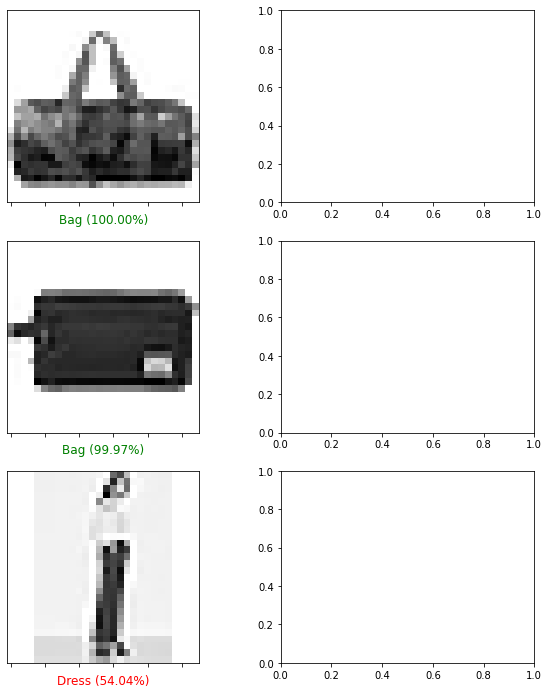

In [165]:
plot_images(y_true=test_labels,
            y_probs=y_probs,
            classes=class_names,
            test_data=test_data_norm)